In [2]:
from google.colab import files

uploaded = files.upload()

Saving Summer_products.csv to Summer_products.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats

In [4]:
df = pd.read_csv('Summer_products.csv')

display(df)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summe

In [5]:
# Cleaning up the variable product_variation_size_id to the maximum extent possible
df['product_variation_size_id'] = df['product_variation_size_id'].str.upper()
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('.', '')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('SIZE ', '')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('SIZE-', '')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('SIZE', '')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('SIZE/', '')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('CHOOSE A SIZE', 'NA')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('SUIT-S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('SUIT S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('US-S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('S PINK', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('6XL', 'XXXXXXL')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('5XL', 'XXXXXL')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('4XL', 'XXXXL')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('3XL', 'XXXL')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace('2XL', 'XXL')
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace(' ', '')

# Chi-Squared Test
To check for independence between the discrete variables uses_ad_boosts and badge_product_quality

In [6]:
# Creating a contingency table for the variables uses_ad_boosts and badge_product_quality
data_crosstab = pd.crosstab(df['uses_ad_boosts'], df['badge_product_quality'],  margins = False) 

crosstab_array = np.array(data_crosstab)

# Calculating the chi-squared statistic and significance
stat, p, dof, expected = scipy.stats.chi2_contingency(crosstab_array)

if p <= 0.05:
    print('Null hypothesis rejected; Variables are dependent')

else:
    print('Cannot reject null hypothesis; Variables are independent')

Cannot reject null hypothesis; Variables are independent


# Point Estimates of Number of Units Sold

In [7]:
# Computing the point estimate of mean for units_sold
print('Average number of units sold:', df['units_sold'].mean())

# Computing the point estimate of variance for units_sold
print('Variance in units sold:', df['units_sold'].var())

Average number of units sold: 4339.005085823268
Variance in units sold: 87544827.71116813


# 95% Confidence Interval For Units Sold

In [8]:
import numpy as np
import scipy.stats

# Function to calculate mean confidence interval
def mean_confidence_interval(data, confidence=0.95):
    
    a = 1.0 * np.array(data)
    n = len(a)
    
    # Calculating the mean and standard error of mean
    m, se = np.mean(a), scipy.stats.sem(a)
    
    # Using the mean CI formula for the T-distribution
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [9]:
mean, lower_limit, upper_limit = mean_confidence_interval(df['units_sold'])
    
print('Sample mean for units_sold is:', mean)
print('95% CI Interval of mean for units_sold is:', '(', lower_limit, ', ', upper_limit, ')')

Sample mean for units_sold is: 4339.005085823268
95% CI Interval of mean for units_sold is: ( 3876.268874757474 ,  4801.741296889062 )


# QQ Plot for Price Distribution
To check if the distribution of prices is gaussian or not

QQ plot for the number of units sold against the normal distribution


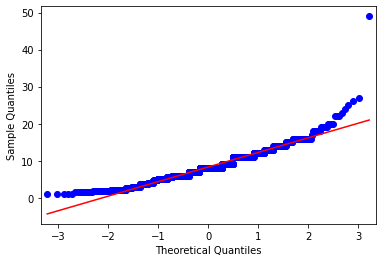

In [11]:
import statsmodels.api as sm

print("QQ plot for the number of units sold against the normal distribution")

# Plotting the QQ plot against the normal distribution
fig = sm.qqplot(df['price'], line = 's')
plt.show()

# Log Likelihood for Price Distribution

In [13]:
import scipy.stats.distributions

# Fitting the data to a normal distribution (assumed)
dist = getattr(scipy.stats, 'norm')
params = dist.fit(df['price'])

# Calculating the log likelihood using the calculated fitting parameters
LLH = dist.logpdf(df['price'], *params).sum()
print('Log Likelihood value for the price distribution with respect to a Gaussian distribution is:', LLH)

Log Likelihood value for the price distribution with respect to a Gaussian distribution is: -4385.172203358534


From the computed log likelihood value and the QQ plot, we can infer that the distribution is a bit contorted relative to the normal distribution

# Welch's T-Test
To check if the mean number of units sold is really different with and without ad-boosts

In [14]:
def Welch_ttest(a, b):

    # Calculating the t-statistic and significance using the Welch test
    t, p_value = scipy.stats.ttest_ind(a, b, equal_var=False, nan_policy='propagate')

    if p_value <= 0.05:
        print('Null hypothesis rejected; mean values are really different')

    else:
        print('Mean values cannot be said to be different definitively')

In [15]:
# New dataframe containing only entries with ad-boosts
df_ad_boosts = df.loc[df['uses_ad_boosts'] == 1]
data_1 = df_ad_boosts['units_sold']

# New dataframe containing only entries without ad-boosts
df_no_ad_boosts = df.loc[df['uses_ad_boosts'] == 0]
data_2 = df_no_ad_boosts['units_sold']

Welch_ttest(np.array(data_1), np.array(data_2))

Mean values cannot be said to be different definitively


From the given data, we cannot effectively conclude that using ad boosts makes a difference in sales

# Wilcoxon Rank Sum Test
An alternative test to check if the mean number of units sold is really different with and without ad-boosts

In [20]:
def Wilcoxon_rank_sum_test(a, b):

    # Calculating the t-statistic and significance using the Wilcoxon signed rank test
    t, p_value = scipy.stats.ranksums(a, b)

    if p_value <= 0.05:
        print('Null hypothesis rejected; mean values are really different')

    else:
        print('Mean values cannot be said to be different definitively')

In [21]:
# New dataframe containing only entries with ad-boosts
df_ad_boosts = df.loc[df['uses_ad_boosts'] == 1]
data_1 = df_ad_boosts['units_sold']

# New dataframe containing only entries without ad-boosts
df_no_ad_boosts = df.loc[df['uses_ad_boosts'] == 0]
data_2 = df_no_ad_boosts['units_sold']

Wilcoxon_rank_sum_test(np.array(data_1), np.array(data_2))

Mean values cannot be said to be different definitively


Similar conclusion as drawn from Welch's T-Test

# Spearman's Correlation
To check if price and units sold are linearly correlated

In [22]:
def spearmanr(a, b):

    # Calculating the correlation and significance values
    correlation, p_value = scipy.stats.spearmanr(a, b, axis=0, nan_policy='propagate')

    if p_value <= 0.05:
        print('Correlation value: ', correlation)
        print('Significance of correlation: ', p_value)
        print('Null hypothesis rejected')

    else:
        print('Correlation value: ', correlation)
        print('Significance of correlation: ', p_value)
        print('Null hypothesis cannot be rejected due to insufficient significance')

In [23]:
spearmanr(df['price'], df['units_sold'])

Correlation value:  0.06176921819884973
Significance of correlation:  0.014276684351220653
Null hypothesis rejected
